In [23]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#load_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/cos_sim'
load_base_dir = '../../results/res_umap'
assert os.path.isdir(load_base_dir)
save_base_dir = '../../results/assets/fig04'
network = 'pytorch/brain_diffuser_versatile_diffusion'
feat_name ='text_encoder' # 'vision_encoder'

In [43]:
#file_name = 'nsd_embedding_norm_default_param.npy'
prefix_list = ['nsd', 'deeprecon', 'both']
prefix = prefix_list[1]
file_name = f'{prefix}_embedding_norm.npy'

#file_name = f'{prefix}_embedding_norm_default_param.npy'

In [44]:
embeddings = np.load(os.path.join(load_base_dir, network, feat_name ,file_name))

In [48]:
# Define the base directory for hover data
nsd_hover_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/'

# Load and prepare training data
df_NSD_train = pd.read_csv(f'{nsd_hover_base_dir}/NSD_sub01_hover.csv', index_col=0)
df_NSD_train['dataset'] = 'nsd-train (Sub 01)'
df_NSD_train_sorted = df_NSD_train.sort_values('image id').reset_index(drop=True)

# Load and prepare test data
df_NSD_test = pd.read_csv(f'{nsd_hover_base_dir}/NSD_shared1000_hover.csv', index_col=0)
df_NSD_test['dataset'] = 'nsd-test'
df_NSD_test_sorted = df_NSD_test.sort_values('image id').reset_index(drop=True)

nsd_hover_base_dir = '/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/'

df_dr_train =  pd.read_csv('/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/GOD_train_hover.csv', index_col=0)
df_dr_train['dataset'] = 'dr-train'
df_dr_train_sorted = df_dr_train.sort_values('image id').reset_index(drop=True)

df_dr_test =  pd.read_csv('/home/nu/data/contents_shared/NSD-stimuli/derivatives/umap/GOD_test_hover.csv', index_col=0)
df_dr_test['dataset'] = 'dr-test'
df_dr_test_sorted = df_dr_test.sort_values('image id').reset_index(drop=True)

if prefix == 'nsd':
    merge_df = pd.concat([df_NSD_train, df_NSD_test, ])
    data_dict = {
    0:'nsd-train (Sub 01)',
    1: 'nsd-test'}
    num_train = len(df_NSD_train)
elif prefix == 'deeprecon':
    merge_df = pd.concat([df_dr_train, df_dr_test])
    data_dict = { 
    0: 'dr-train',
    1: 'dr-test', 
    }
    num_train = len(df_dr_train)
elif prefix == 'both':
    merge_df = pd.concat([df_dr_train, df_dr_test,df_NSD_train, df_NSD_test,])
    data_dict = {
        0: 'dr-train',
        1: 'dr-test', 
        2: 'nsd-train (Sub 01)',
        3: 'nsd-test', }


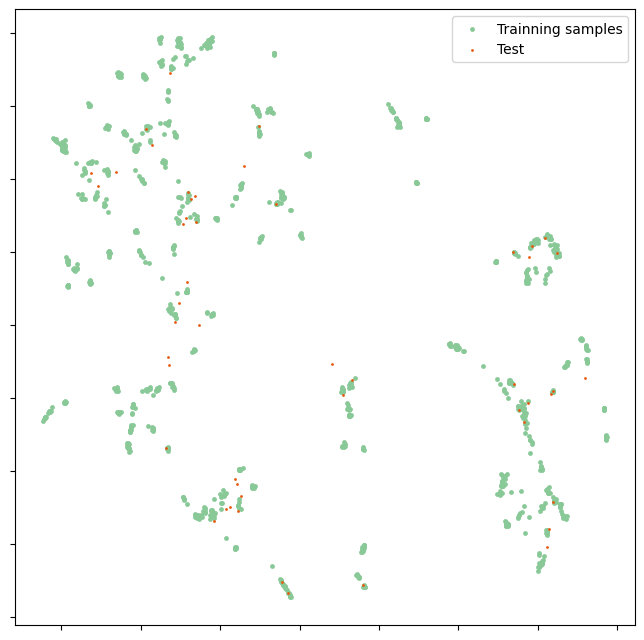

In [49]:
ss = 12

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#ax.scatter(nsd_umap[:,0], nsd_umap[:,1], c=kmeans.labels_, cmap = 'tab20' , alpha=0.1)

ax.scatter(embeddings[:num_train][:,0],embeddings[:num_train][:, 1],  s=ss,linewidths=0.0,edgecolors='black', c="#89C997", alpha=1.0, label='Trainning samples')

#ax.scatter(nsd_umap[:num_train][:,0],nsd_umap[:num_train][:, 1],  s=ss,linewidths=0.0,edgecolors='black', c="#3EB370", alpha=1.0, label='Trainning samples')

ax.scatter(embeddings[num_train:][:,0],embeddings[num_train:][:,1], s=ss-8,  linewidths=0.0, edgecolors='black', color=[(230/255, 88/255, 13/255)], alpha=1.0, label='Test')


ax.set_xticklabels([])
ax.set_yticklabels([])

plt.legend()

save_base_dir = '../../results/assets/fig04/Sup'
save_dir = save_base_dir
os.makedirs(save_dir, exist_ok=True)

fig.savefig(os.path.join(save_base_dir, file_name.replace("npy", "pdf")))

fig.savefig(os.path.join(save_base_dir, file_name.replace("npy", "png")), dpi=600)


In [35]:
file_name.replace("npy", "pdf")

'nsd_embedding_norm.pdf'